In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn.tree import DecisionTreeClassifier as DTC

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

from utils import plot_2d, plot_classifier_boundary, test_model, test_model_with_standard_scaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# LogReg vs kNN

### Logistic Regression performing better than kNN

Since Logistic regression learns a linear classifier, while k-nearest neighbors can learn non-linear boundaries as well, a good dataset for logistic regression and not so good for kNN would be one that assumed a linear shape.


Even though both methods are essentially different, it's impossible to tell which of them perform better in general. Both can find examples where one is better than the other.

A dataset was used with its classes split by a linear function, therefore being the best case scenario for the Logistic Regression, where it can perform worst in kNN.

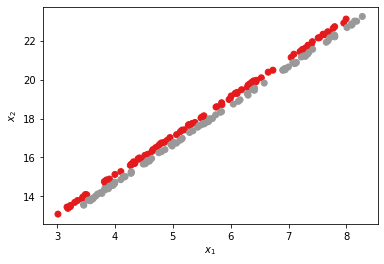

In [25]:
def g():
    f1 = lambda x: 2 * x + 7 + np.random.uniform(0, .15)
    f2 = lambda x: 2 * x + 6.6 + np.random.uniform(0, .15)
    
    X1 = np.asarray([np.asarray([x1, f1(x1)]) for x1 in np.random.uniform(3, 8, size=(100))])
    y1 = np.zeros((X1.shape[0],))
    
    X2 = np.asarray([np.asarray([x1, f2(x1)]) for x1 in np.random.uniform(3.3, 8.3, size=(100))])
    y2 = np.ones((X2.shape[0],))
    
    X = np.concatenate((X1, X2,), axis=0)
    y = np.concatenate((y1, y2,), axis=0)
    
    return X, y

X, y = g()
plot_2d(X, y)

AUC score: 0.994


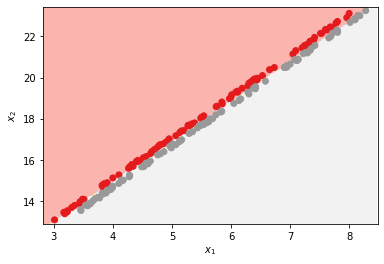

In [26]:
lr = LogisticRegression(max_iter=1000)
test_model(lr, X, y)

AUC score: 0.763


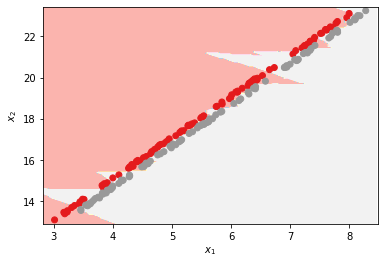

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
test_model(knn, X, y)

### kNN performing better than Logistic Regression

The kNN method only requires few hyperparameters to tune, while Logistic Regression is a discriminative algorithm (tries to find boundaries between the two classes). Since the outcome of a logistic regression depends on the sum of the input parameters, the function used that performed badly in this method was created along with low standard values and n=3.

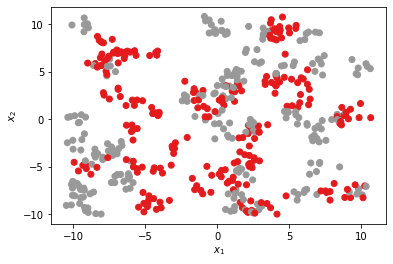

In [62]:
def mb_lr():
    X, y = make_blobs(
        n_samples=500, 
        n_features=2,
        centers=80,
        cluster_std=0.5,
        random_state=68 
    )
    y = y % 2
    return X, y
    
X, y = mb_lr()
plot_2d(X, y)

AUC score: 0.819


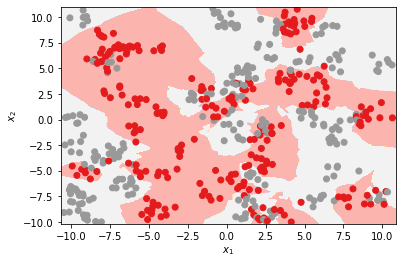

In [58]:
knn = KNeighborsClassifier(n_neighbors=3)
test_model(knn, X, y)

AUC score: 0.473


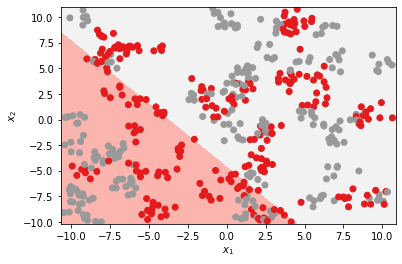

In [57]:
lr = LogisticRegression(max_iter=1000)
test_model(lr, X, y)

# LDA vs Decision Tree

### LDA performing better than Decision Tree

The "lda_dt" function takes into consideration that decision tree is a non-linear classifier, so there's no equation to express relationship between independent and dependent variables and it won't perform good in linear datasets.

With the LDA assumption that each attribute has the same variance, that values of each variable vary around the mean by the same amount on average, the linear function perform better with LDA method than decision tree.

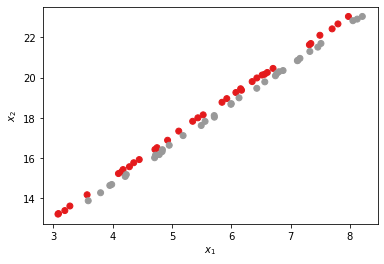

In [63]:
def lda_dt():
    f1 = lambda x: 2 * x + 7 + np.random.uniform(0, .15)
    f2 = lambda x: 2 * x + 6.6 + np.random.uniform(0, .15)
    
    X1 = np.asarray([np.asarray([x1, f1(x1)]) for x1 in np.random.uniform(3, 8, size=(35))])
    y1 = np.zeros((X1.shape[0],))
    
    X2 = np.asarray([np.asarray([x1, f2(x1)]) for x1 in np.random.uniform(3.3, 8.3, size=(35))])
    y2 = np.ones((X2.shape[0],))
    
    X = np.concatenate((X1, X2,), axis=0)
    y = np.concatenate((y1, y2,), axis=0)
    
    return X, y


X, y = lda_dt()
plot_2d(X, y)

AUC score: 1.000


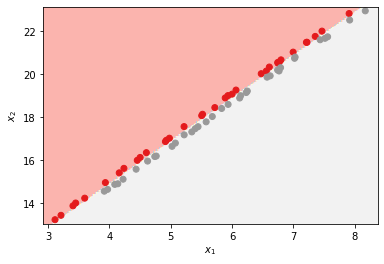

In [5]:
lda = LDA()
test_model(lda, X, y)

AUC score: 0.540


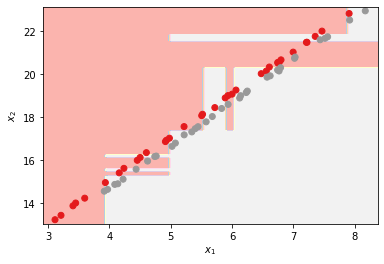

In [6]:
dt = DTC(max_depth=16)
test_model(dt, X, y)

### Decision Tree performing better than LDA

To make Decision Tree perform better than LDA, a dataset was generated in a shape of a circle containing a smaller circle in 2-dimensional space. The data follows a Gaussian (normal) distribution.

Since LDA is mostly a linear method, in that scenario it performed badly.

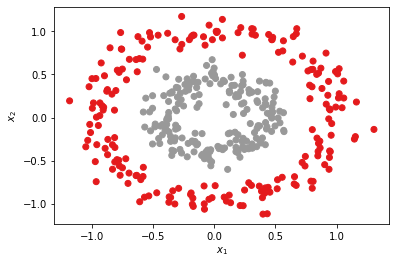

In [33]:
def dt_b():
    X, y = make_circles(
        n_samples=400, 
        random_state=42, 
        factor=0.42, 
        noise=0.1
    )
    return X, y

X, y = dt_b()
plot_2d(X, y)

AUC score: 0.978


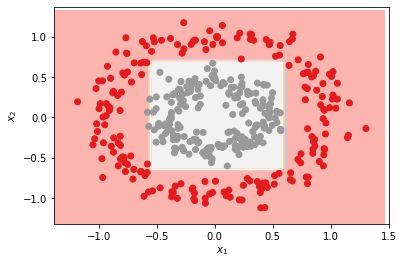

In [11]:
dtc = DTC(max_depth=12)
test_model(dtc, X, y)

AUC score: 0.409


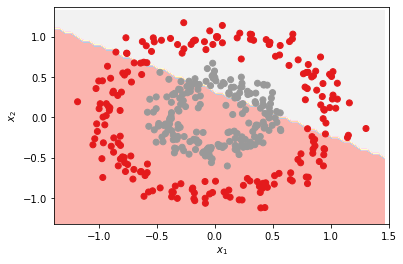

In [13]:
lda = LDA()
test_model(lda, X, y)

# LDA vs QDA

### LDA performing better than QDA

With both LDA and QDA methods, the assumption taken into consideration was that LDA assumes that the feature covariance matrices of both classes are the same (resulting in a linear decision boundary), when in QDA method, it allows different feature covariance matrices for different classes, leading to a quadratic decision boundary.

The "s_cov" dataset assumes that both have the same covariance matrix, which leads to a sligly better performance of LDA over QDA.

The results are not that different because it's seen that LDA is a special case of QDA, where the Gaussians for each class are assumed to share the same covariance matrix.

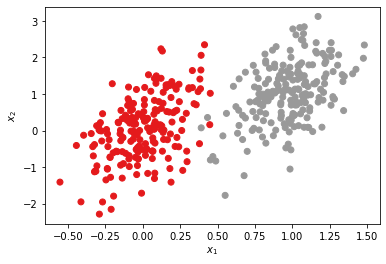

In [64]:
def s_cov():
    #Generate 2 Gaussians samples with the same covariance matrix
    n, dim = 200, 2
    np.random.seed(0)
    C = np.array([[0., -0.75], [0.2, 0.4]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

X, y = s_cov()
plot_2d(X, y)

AUC score: 0.998


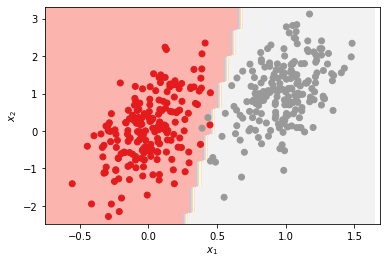

In [15]:
lda = LDA()
test_model(lda, X, y)

AUC score: 0.992


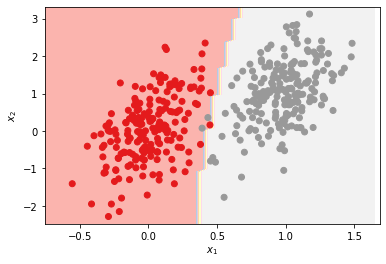

In [19]:
qda = QDA()
test_model(qda, X, y)

### QDA performing better than LDA

The "d_cov" function genereted a dataset assuming different covariance matrix for each class. In this case, the results of the QDA model where significant better than LDA model.

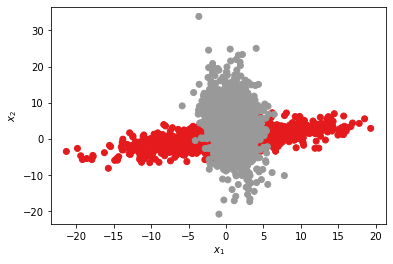

In [65]:
def d_cov():
    n, dim = 1000, 2
    np.random.seed(0)
    C = np.array([[0.0, -1.0], [3.5, 0.7]]) * 2.0
    X = np.r_[
        np.dot(np.random.randn(n, dim), C),
        np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4]),
    ]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

X, y = d_cov()
plot_2d(X, y)

AUC score: 0.850


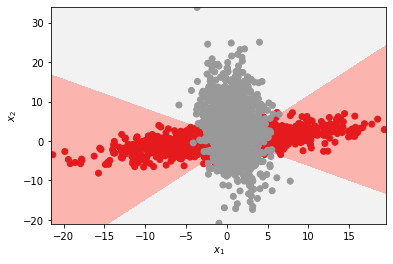

In [22]:
qda = QDA()
test_model(qda, X, y)

AUC score: 0.645


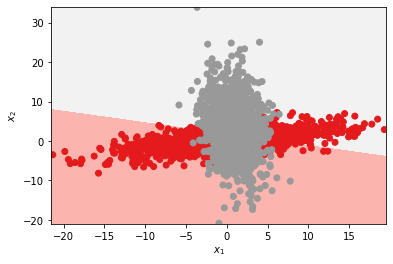

In [23]:
lda = LDA()
test_model(lda, X, y)